In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
from IPython.display import display

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# in the training set we have 55,000 examples, 784 pixels (28x28)
# and 10 kinds of labels (0 through 9) using "one-hot" encoding
img_width_height = np.sqrt(mnist.train.images.shape[1])
display(img_width_height)
display(mnist.train.images.shape)
display(mnist.train.labels.shape)

28.0

(55000, 784)

(55000, 10)

'the label is 5'

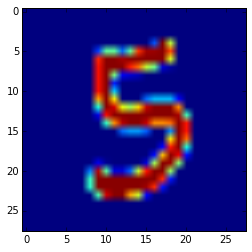

In [4]:
# let's look at an example
which_sample = 66
label = mnist.train.labels[which_sample, :].nonzero()[0][0]
display('the label is {}'.format(label))
plt.imshow(np.reshape(
    mnist.train.images[which_sample, :],
    (img_width_height, img_width_height)))

In [5]:
# now lets begin constructing the TF graph as in the example
# We start by creating a placeholder into which we can drop
# any number of images as flatened arrays (the None allows
# us to indicate that that dimention is not fixed)
x = tf.placeholder(tf.float32, [None, 784])

# we'll now need variables to hold weights and biases
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# now we specify the model (x and W are multiplied in reverse order)
# from standard notation in order to allow for the None dimension
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [6]:
# here we use cross-entropy as our loss function. For discussion
# on why this is preferable to mean squared error see:
# https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

In [7]:
# now we train the model by asking gradient descent to
# minimize cross-entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# and now we can set up the session and perform the training by
# iterating 1000 times
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
for i in range(1000):
    # feed the next batch of 100 samples in and iterate
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [8]:
# now that our model has been trained we should evaluate how
# well we're doing
correct_prediction = tf.equal(tf.arg_max(y, 1), tf.arg_max(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
display(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.91409999

In [12]:
# now let's just poke at the model fit a bit to see what it looks like
display(sess.run(tf.reduce_min(W, 0)))

array([-0.72752684, -0.58193076, -0.75652432, -0.52426308, -0.71661836,
       -0.73790604, -0.59031713, -0.85555381, -0.39442459, -0.54930854], dtype=float32)

In [24]:
bias = sess.run(b)
bias

array([-0.6139586 ,  0.43089592,  0.24060251, -0.32656997, -0.00913699,
        1.93838346, -0.17525733,  0.91162997, -2.03941298, -0.35717407], dtype=float32)

In [15]:
sess.run(tf.shape(b))

array([10], dtype=int32)

'Weights for 0'

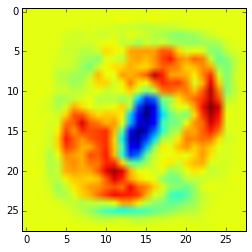

'Weights for 1'

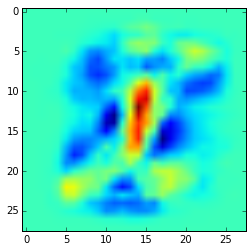

'Weights for 2'

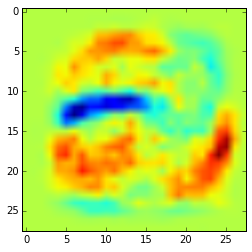

'Weights for 3'

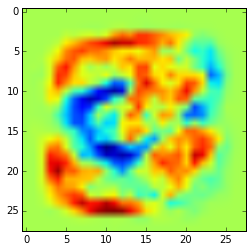

'Weights for 4'

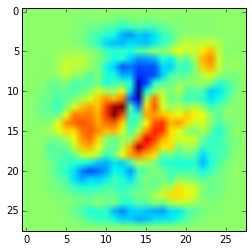

'Weights for 5'

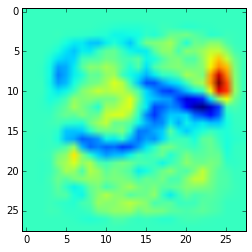

'Weights for 6'

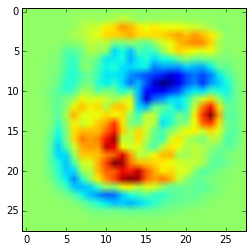

'Weights for 7'

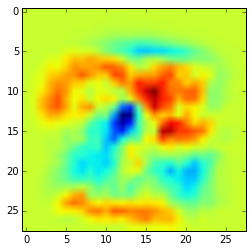

'Weights for 8'

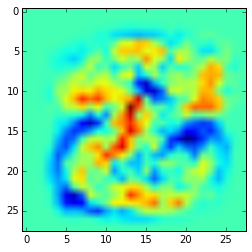

'Weights for 9'

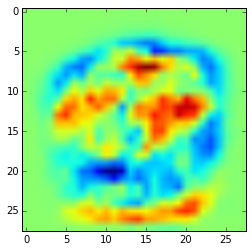

In [27]:
# let's take a peek at some of the weights that were fit
weights = sess.run(W)
for i in range(10):
    display('Weights for {}'.format(i))
    plt.imshow(np.reshape(weights[:, i], (img_width_height, img_width_height)))
    plt.show()